<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Установка-и-импортирование-библиотек" data-toc-modified-id="Установка-и-импортирование-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Установка и импортирование библиотек</a></span></li><li><span><a href="#Выгрузка-и-первичный-осмотр-данных" data-toc-modified-id="Выгрузка-и-первичный-осмотр-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выгрузка и первичный осмотр данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Обработка-текста-комментариев" data-toc-modified-id="Обработка-текста-комментариев-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка текста комментариев</a></span></li><li><span><a href="#Формирование-выборок" data-toc-modified-id="Формирование-выборок-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Формирование выборок</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-Логистической-регрессии" data-toc-modified-id="Модель-Логистической-регрессии-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель Логистической регрессии</a></span></li><li><span><a href="#Модель-Дерева-решений" data-toc-modified-id="Модель-Дерева-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель Дерева решений</a></span></li><li><span><a href="#Модель-мультиномиального-распределения" data-toc-modified-id="Модель-мультиномиального-распределения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель мультиномиального распределения</a></span></li><li><span><a href="#Тест" data-toc-modified-id="Тест-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Тест</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

---

# Описание исследования

---

Интернет-магазин ***«Викишоп»*** запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию

---

# Цель исследования

---

Обучить модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок

---

# Задачи исследования

---

1. Загрузить и подготовить данные
2. Обучить разные модели 
3. Сделать выводы

---

# Исходные данные

---

Для проведения исследования заказчик передал нам *CSV*-файл с данными комментариев пользователей: `toxic_comments.csv`

Столбец `text` в датафрейме содержит **текст комментария**, а `toxic` — **целевой признак**

---

## Подготовка

### Установка и импортирование библиотек

In [1]:
!pip install -U scikit-learn -q

In [2]:
#Импорт библиотек:

#Библиотека для взаимодействия с ОС:
import os

#Библиотеки для работы с табличными данными и массивами:
import pandas as pd
import numpy as np

#Библиотеки для графической иллюстрации:
import matplotlib.pyplot as plt

#Библиотеки для обработки текста:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re

#Библиотеки ML:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

#Библиотека для отслеживания прогресса:
from tqdm import tqdm

#Игнорирование предупреждений:
import warnings

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))


#Задаем константы:
RANDOM_STATE = 42
TEST_SIZE = 0.25

#Игнорирование предупреждений
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Выгрузка и первичный осмотр данных

In [3]:
#Локальный путь к файлу:
local_path = '/datasets/toxic_comments.csv'

#Сетевой путь к файлу:
url_path = 'https://code.s3.yandex.net/datasets/toxic_comments.csv'

#Проверяем наличие файла по заданному локальному пути:
if os.path.exists(local_path):
    
    #Считываем файл
    df = pd.read_csv(local_path)
    print("Данные загружены из локального файла")
    
    # Узнаем размер файла в байтах
    file_size = os.path.getsize(local_path)
    print(f"Размер файла: {file_size / (1024 * 1024):.2f} MB") 

#Проверяем наличие файла по заданному сетевому пути:    
elif os.path.exists(url_path):
    df = pd.read_csv(url_path)
    print("Данные загружены из сети")
    
#Генерируем исключение (в случае отстуствия файлов по заданным путям):    
else:
    print("Данных о файле нет в локальной и сетевой директориях")
    
#Используем специальную команду отображения таблиц, для наглядного просмотра всех данных:    
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Данные загружены из локального файла
Размер файла: 61.94 MB


---

> Просмотрим случайные 10 комментариев, зафиксируем их. Чтобы посмотреть новые, задать параметру: `random_state = None`

In [4]:
#Просмотр 10 случайных образцов:
df.sample(10, random_state=RANDOM_STATE)

,Unnamed: 0,text,toxic
31015,31055,"Sometime back, I just happened to log on to www.izoom.in with a friend’s reference and I was amazed to see the concept Fresh Ideas Entertainment has come up with. So many deals… all under one roof. This website is very user friendly and easy to use and is fun to be on.\nYou have Gossip, Games, Facts… Another exciting feature to add to it is Face of the Week… Every week, 4 new faces are selected and put up as izoom faces. It’s great to have been selected in four out of a group of millions. \nThis new start up has already got many a deals in its kitty. Few of them being TheFortune Hotel, The Beach… are my personal favorites. izoom.in has a USP of mobile coupons. Coupons are available even when a user cannot access internet. You just need to SMS izoom support to 56767 and you get attended immediately.\nAll I can say is izoom.in is a must visit website for everyone before they go out for shopping or dining or for outing.\nCheers!!!",0
102832,102929,"""\n\nThe latest edit is much better, don't make this article state """"super."""" at all. 71.237.70.49 """,0
67317,67385,""" October 2007 (UTC)\n\nI would think you'd be able to get your point across, and be immune to any objections, were you to simply embellish the second sentence of the article by changing """"he was schooled at Thornleigh Salesian College"""" to """"he was schooled at (the then all-Catholic) Thornleigh Salesian College"""". \n\nGood suggestion from an Anon - what do you think? Rgds, - 07:53, 5""",0
81091,81167,Thanks for the tip on the currency translation. Think it's all done now.,0
90091,90182,"I would argue that if content on the Con in comparison to the Arts Music is out of proportion, then it warrants further contribution to the article, not the removal of an indepth piece of content. Also, as I mentioned before, the Arts Music unit has a notable history comparable to that of the Con itself. Because of this, I would further argue that content on the Arts Music Unit is more relevant to this article than the information on the Newcastle Conservatorium.",0
1860,1860,"""=Reliable sources===\nCheating:\n""""Barry Bonds:Cheater"""" from CBS, yea I kinda think that is reliable. \n""""Dear Barry Bonds, You are either an outright cheater or very stupid"""" from the USA Today \n""""Yes, Barry Bonds is a cheater. He is a cheater of the worst sort"""" \nLying:\n""""It's clear, Barry Bonds' a liar"""" New York Daily News, another pretty freakin' reliable source. \n""""Barry Lamar Bonds is a bad man"""" Baseball Digest \n""""but Bonds is a liar, a cheater, a whiner and a bad influence on America's youth"""" Mark Barnes\n\n==""",1
125293,125422,WTF=\n\nHow The Fuck Does This Person Merit A Page On Wikipedia.,1
148986,149142,"cajuns, acadians\nCajuns, acadians, louisianans, they're so many different names for different americans of french descent because their culture is so rich and somewhat so different but so close at the same time. I'm an acadian but more importantly I'm a french american so I really don't see why there should be a difference. \n\nIf you say there should be two different list, it doesn't make sense. The people on the french-american list should be in one of wiki-invented list of cajuns or acadians. I understand there are some more recent french-americans who are only 1 or 2 generations-old americans but this distinction isn't made for italian-americans, german-americans. I'm surprised to see Albert Einstein a fairly recent immigrant in American history next to Katherine Heigl, a 10 to 12 generations american. \\\n\nThis is all race-based, biased because french-bashing don't stop at the bush government level.",0
89697,89784,"Hi - I dropped a pin in Google Maps at the ceremonial site near Chief Tayak's grave and recorded the lat/long. Is this not permitted? It maps correctly in other sites, as well, so I believe they're the correct coordinates. I live nearby, so could also visit the site and get the coordinates from GPS.",

In [5]:
#Общая информация и наличие дубликатов:
df.info()
print('Duplicates count:', df['text'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
Duplicates count: 0


> Датафрейм имеет 3 поля: `Unnamed: 0`, `text`, `toxic` (как видно поле `Unnamed: 0` - не несет полезной информации, его можно удалить)

> `toxic` - столбец содержит размеченные данные с значениями `0` и `1`, перед обучением требуется посмотреть на и соотношения, сделать проверку на сбалансированность

> `text` - столбец содержит комментарии пользователей, в которых содержаться символы экранирования, различные знаки остонова и другие неккоректные символы, которые нужно обработать, до передачи данных в модель. (Как видно неформармальная лексика выделена в разметке верно, плохие комментарии имеют значения токсичности `1`)

> Дубликатов в данных - `нет`

### Анализ данных

In [6]:
#Удаление лишнего столбца:
df = df.drop(['Unnamed: 0'], axis=1)

#Проверка удаления:
df.head()

,text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


> Лишний столбец - удалили

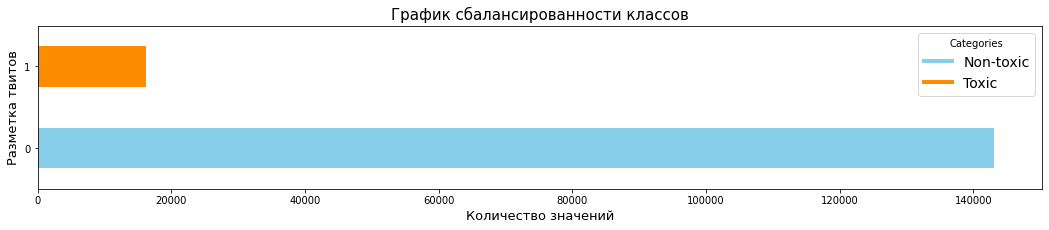

In [7]:
colors = ['skyblue', 'darkorange'] 
labels = ['Non-toxic', 'Toxic']
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]

plt.figure(figsize=(18,3))
df['toxic'].value_counts().plot(kind='barh', color=colors)
plt.title('График сбалансированности классов', fontsize=15)
plt.ylabel('Разметка твитов', fontsize=13)
plt.xlabel('Количество значений', fontsize=13)
plt.legend(handles, labels, title='Categories', prop={'size': 14})
plt.show()

In [8]:
df['toxic'].value_counts(normalize=True)

0    0.898388
1    0.101612
Name: toxic, dtype: float64

> Исходя из графика - **данные несбалансированны** (Количество токсичных комментариев во много раз меньше 1 к 10)

### Обработка текста комментариев

In [9]:
#Определяем функцию для получения тегов:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [10]:
#Определим функцию для филтрации текста:
def text_filter(text: pd.Series, stop_words: set = None, lemmatize: bool = True) -> pd.Series:
    """Функция фильтрации текста принимает 3 аргумента:
       Серию состоящую из комментариев text - pd.Series;
       Стоп-слова - передается словарь исключений;
       Буленговый параметр, отвечающий за выполнение лемматизации.
       Функция возвращает отфильтрованный текст в виде Series
    """
    #Приводим текст к нижнему регистру, исключаем все символы некорректные символы:
    text = re.sub(r'[^a-z ]', ' ', text.lower()).split()
    
    #Лемматизируем все предложения в каждом комментарии:
    if lemmatize:
        wnl = WordNetLemmatizer()
        text = [wnl.lemmatize(word, get_wordnet_pos(word)) for word in text]
    
    #Исключаем стоп слова:
    if stop_words:
        text = [word for word in text if not word in stop_words] 
    
    return ' '.join(text)

Выполним проверку обработки текста на примере небольшого датафрейма с текстом:

In [11]:
sentence1 = "The striped bats are hanging on their feet for best"
sentence2 = "you should be ashamed of yourself went worked"
df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])
print(df_my)


print(df_my['text'].apply(text_filter))

                                                  text
0  The striped bats are hanging on their feet for best
1        you should be ashamed of yourself went worked
0    the strip bat be hang on their foot for best
1       you should be ashamed of yourself go work
Name: text, dtype: object


### Формирование выборок

In [12]:
#интегрируем прогресс-бары tqdm в методы pandas:
tqdm.pandas()

#Создаем корпус слов:
corpus = df['text'].progress_apply(text_filter, stop_words=stop_words)

#Делим данные на тренеровочную и тестовую выборки:
X_train, X_test, y_train, y_test = (
    train_test_split(corpus, df['toxic'], test_size=0.25, random_state=RANDOM_STATE))

#Освобождаем память:
del corpus

100%|██████████| 159292/159292 [16:59<00:00, 156.26it/s]


Посмотрим, какое **количество признаков** создаст векторизация различных **N-грамм**:

In [13]:
#Переберем различные N-граммы в цикле:
for r, label in [((1, 1), 'униграмма'), ((2, 2), 'биграмма'), ((1, 2), 'униграмма и биграмма')]:
    features_count = TfidfVectorizer(ngram_range=r).fit_transform(X_train).shape[1]
    print(f'N-gramm range ({r}) - {label}: количество признаков - {features_count}')

N-gramm range ((1, 1)) - униграмма: количество признаков - 126730
N-gramm range ((2, 2)) - биграмма: количество признаков - 1839774
N-gramm range ((1, 2)) - униграмма и биграмма: количество признаков - 1966504


> Признаковое пространство двух последних N-грамм состовляет порядка 2 млн, что очень много, поэтому будем рассматривать только униграммы, для этого просто будем вызывать параметр `TfidfVectorizer()` - по умолчанию он создает униграммы `(1,1)`

> Зададим порог значимости: `min_df = 1` - чтобы включить все входящие слова

## Обучение

### Модель Логистической регрессии

In [14]:
def training(model, params):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(min_df = 1)),
        ('model', model)])
    
    grid = GridSearchCV(pipeline, cv = 3, n_jobs = -1, param_grid = params ,scoring = 'f1', verbose = False)
    
    grid.fit(X_train, y_train)
    
    print('Лучшая метрика f1:', grid.best_score_)
    print('Лучшие гиперпараметры модели:', grid.best_params_)
    return grid

In [15]:
%%time
logreg_model = training(LogisticRegression(class_weight='balanced',
                                           random_state=RANDOM_STATE), {"model__C":[5.0, 10.0, 15.0], 
                                                                        "model__penalty":["l1", "l2"]})

Лучшая метрика f1: 0.7546971554099754
Лучшие гиперпараметры модели: {'model__C': 15.0, 'model__penalty': 'l2'}
CPU times: user 2min 15s, sys: 1min 12s, total: 3min 28s
Wall time: 3min 28s


### Модель Дерева решений

In [16]:
%%time
decision_model = training(DecisionTreeClassifier(class_weight='balanced',
                                            random_state=RANDOM_STATE), {'model__criterion':['gini','entropy'],
                                                                         'model__max_depth':[2,4,6]})

Лучшая метрика f1: 0.5409024500549161
Лучшие гиперпараметры модели: {'model__criterion': 'gini', 'model__max_depth': 6}
CPU times: user 1min 31s, sys: 21.2 ms, total: 1min 31s
Wall time: 1min 31s


### Модель мультиномиального распределения

In [17]:
%%time
nb_model = training(MultinomialNB(), {'model__alpha': [0.01, 0.1, 1, 10]})

Лучшая метрика f1: 0.6524872890899522
Лучшие гиперпараметры модели: {'model__alpha': 0.01}
CPU times: user 41.3 s, sys: 0 ns, total: 41.3 s
Wall time: 41.4 s


### Тест

Лучший результат показала модель логистической регресси, поэтому протестируем её на тестовой выборке:

In [18]:
res = f1_score(y_test, logreg_model.predict(X_test))

print(f"Метрика f1 на тестовой выборке модели LogisticRegression: {res}")

Метрика f1 на тестовой выборке модели LogisticRegression: 0.7588181401740723


## Выводы

Выгруженные данные подготовленны:
    
> Все текстовые значения приведены к нижнему регистру

> Исключены все знаки остановов и различные экранирующие символы

> Произведена токенезация и лемматизация всех слов в текстах

> Исключены все стоп слова, которые не нужны и усложняют обучение моделей

В результате обработки получили корпус слов, который можно использовать для обучения моделей. Векторизация текстов произведена при помощи TF-IDF метода.

Для обучения модели было принято решение использовать модели: `LogisticRegression`, `DecisionTreeClassifier`, `MultinomialNB`.
Данные модели показали такие результаты метрики `f1` на кросс-валидации `cv=3`:


| Модель МО | Метрика f1 (валидационная выборка) | Время обучения |
|:------------:|:---------------:|:---------------:|
| LogisticRegression | 0.7546 | 3min 28s |
| DecisionTreeRegressor | 0.5409 | 1min 31s |
| MultinomialNB | 0.6524 | 41.4s |

Лучший результат метрики `f1`, который соответвует поставленной задаче, у модели логистической регрессии. Данную модель было решено использовать для предсказаний на тестовых данных. Метрика `f1` на тесте получиласл `0.7595`

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны